Weights: [1.60621661 0.63068485]
Bias: [1.83675035]


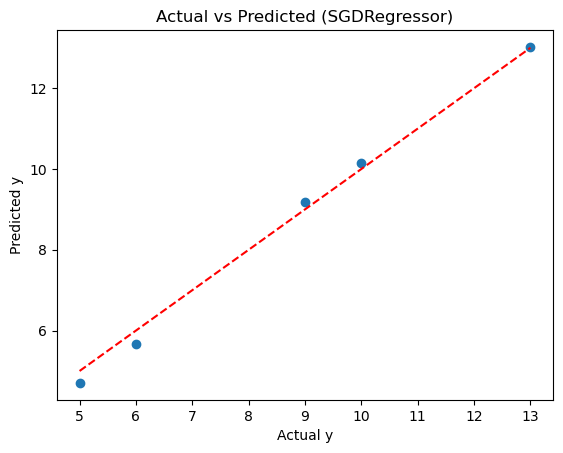

In [6]:
from sklearn.linear_model import SGDRegressor
import numpy as np
import matplotlib.pyplot as plt

# Sample data (2 features)
X = np.array([[1,2],[2,1],[3,4],[4,3],[5,5]])
y = np.array([5,6,9,10,13])

# Create model
model = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant')

# Train model
model.fit(X, y)

# Check learned weights
print("Weights:", model.coef_)
print("Bias:", model.intercept_)

# Predict
y_pred = model.predict(X)

# Plot Actual vs Predicted
plt.scatter(y, y_pred)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted (SGDRegressor)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.show()